# Week 3 EDA
### Tasks:
- Code for Data split 
- Code for EDA

### Data Split:
Because the data is structured as panel data, this data must be split ascendingly by date according to a split decided by the team. 

The first portion of data will be used to predict the last 12 months in the data from December 2023 - December 2024.

Cross-validation for time series can be done later after the train/test split is performed. (Link: https://otexts.com/fpp3/tscv.html)

### Notes to this Step:
Though the data is split at this point, it does not imply that it is ready to be modeled yet, EDA must still be performed strictly upon the training data. The data can still be aggregated as well to try and find a more solid way to predict encounters. 

### Approaches to take:
- Aggregated Barplots
- Decomposition Methods
- Aggregated Time Series Plot
- Geographic Heat Maps

In [1]:
# Standard Setup Import
from _Setup import *

### Data Cleaning
The data needs a slight rework with regards to the dates. The following code will create a date tag associated with each observation's month to make graphing easier. 

In [2]:
# Import sector-level data
sector_df = pd.read_csv(sector_data_csv_path)
sector_df.head()

C:\Users\super\AppData\Local\Temp\ipykernel_20216\2013690093.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sector_df = pd.read_csv(sector_data_csv_path)


,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,2
1,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,OTHER,Title 8,Inadmissibles,29
2,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,BRAZIL,Title 8,Inadmissibles,1
3,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 8,Inadmissibles,1031
4,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,Inadmissibles,9


In [3]:
sector_df.replace(to_replace="2025 (FYTD)", value=2025, inplace=True)
sector_df.replace(to_replace='2024', value=2024, inplace=True)
print(sector_df['Fiscal Year'].unique())

[2020 2021 2022 2023 2024 2025]


C:\Users\super\AppData\Local\Temp\ipykernel_20216\3371552.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sector_df.replace(to_replace='2024', value=2024, inplace=True)


In [4]:
# Create a dictionary mapping month abbreviations (uppercase) to month numbers
month_abbr_to_num = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Function to convert Fiscal Year and Month (abbv) to a Year-Date
def convert_to_fiscal_year_date(row):
    month_num = month_abbr_to_num[row['Month (abbv)'].upper()]
    fiscal_year = int(row['Fiscal Year'])  # Convert Fiscal Year to integer
    
    # Adjust fiscal year for months January through September
    if month_num >= 10:  # Jan - Sep belong to the previous calendar year
        fiscal_year -= 1
    
    # Format the fiscal year and month into a date string
    return f"{fiscal_year}-{month_num:02d}-01"

# Apply the function to create a Year-Date column in fytd_df
sector_df['Year-Date'] = sector_df.apply(lambda row: convert_to_fiscal_year_date(row), axis=1)

# Convert the new column to datetime format
sector_df['Year-Date'] = pd.to_datetime(sector_df['Year-Date'], format='%Y-%m-%d')

# Display the dataframe with the new fiscal year-based Year-Date
print(sector_df['Year-Date'].unique())

<DatetimeArray>
['2019-10-01 00:00:00', '2019-11-01 00:00:00', '2019-12-01 00:00:00',
 '2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00',
 '2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '20

### Resave the updated dataframe to avoid redoing this transformation

In [5]:
sector_df.to_csv(sector_data_csv_path_cleaned, index=False)

### TODO : Train Test Split
The data will be split at December 2023 for the last month of the Train data. Our goal is to predict January 2024-on. 

In [8]:
train_df = sector_df[sector_df['Year-Date'] < '2024-01-01']
test_df = sector_df[sector_df['Year-Date'] >= '2024-01-01']

using Trevor's decomposition figure

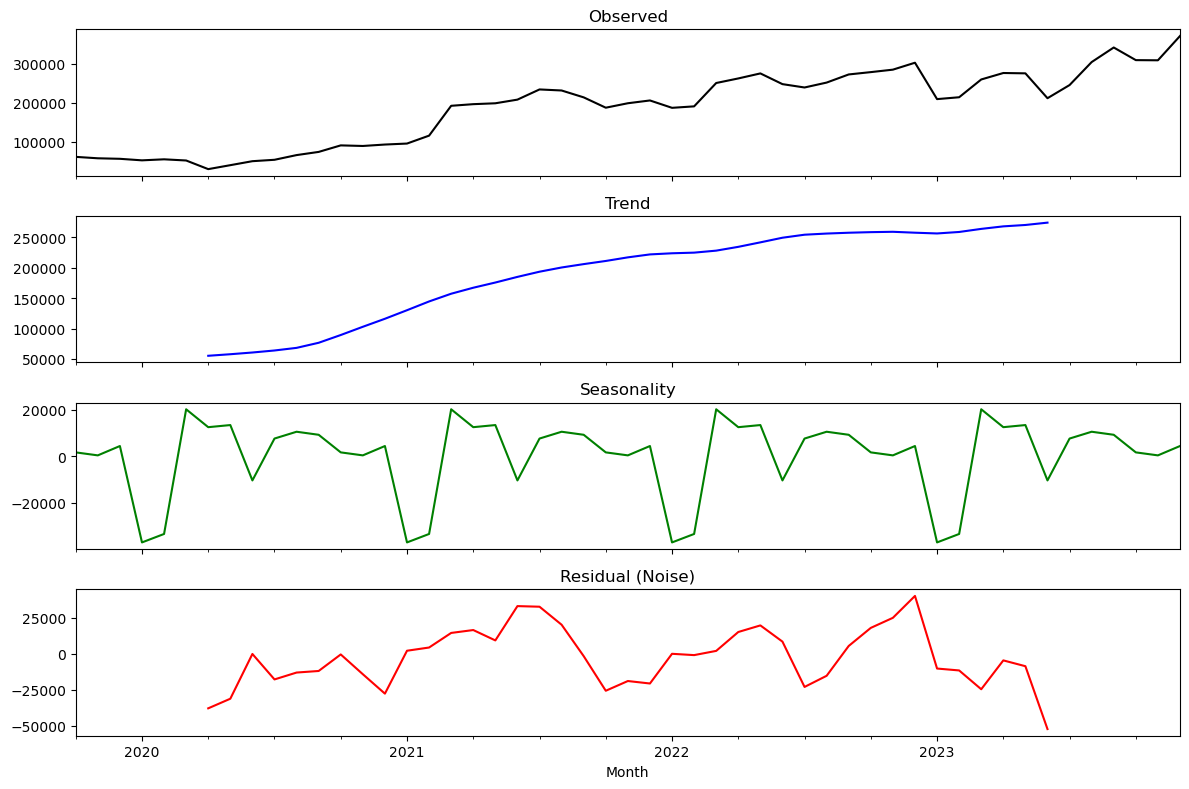

In [9]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure YearDate is a datetime type and set as index
#train_df["Year-Date"] = pd.to_datetime(train_df["Year-Date"])
df_time = train_df.groupby("Year-Date")["Encounter Count"].sum().reset_index()
df_time.set_index("Year-Date", inplace=True)

# Decompose the time series
decomp = seasonal_decompose(df_time["Encounter Count"], model="additive", period=12)  # period=12 for yearly seasonality

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomp.observed.plot(ax=axes[0], title="Observed", color='black')
decomp.trend.plot(ax=axes[1], title="Trend", color='blue')
decomp.seasonal.plot(ax=axes[2], title="Seasonality", color='green')
decomp.resid.plot(ax=axes[3], title="Residual (Noise)", color='red')

plt.xlabel("Month")
plt.tight_layout()
plt.show()



C:\Users\super\AppData\Local\Temp\ipykernel_20216\2162907735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Year"] = train_df["Year-Date"].dt.year
C:\Users\super\AppData\Local\Temp\ipykernel_20216\2162907735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Month"] = train_df["Year-Date"].dt.month
C:\Users\super\AppData\Local\Temp\ipykernel_20216\2162907735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

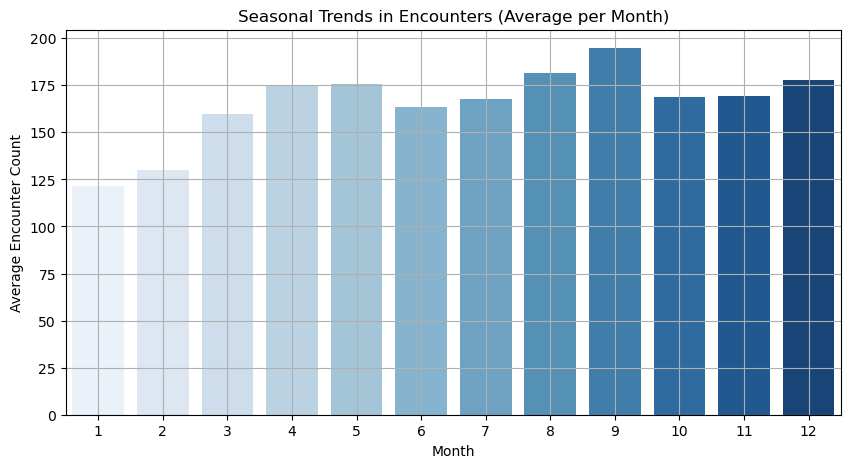

In [12]:
import seaborn as sns

# Extract Month & Year for grouping
train_df["Year"] = train_df["Year-Date"].dt.year
train_df["Month"] = train_df["Year-Date"].dt.month

# Group by Month to see seasonal effects
monthly_avg = train_df.groupby("Month")["Encounter Count"].mean()

# Plot Monthly Seasonality
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Average Encounter Count")
plt.title("Seasonal Trends in Encounters (Average per Month)")
plt.grid(True)
plt.show()


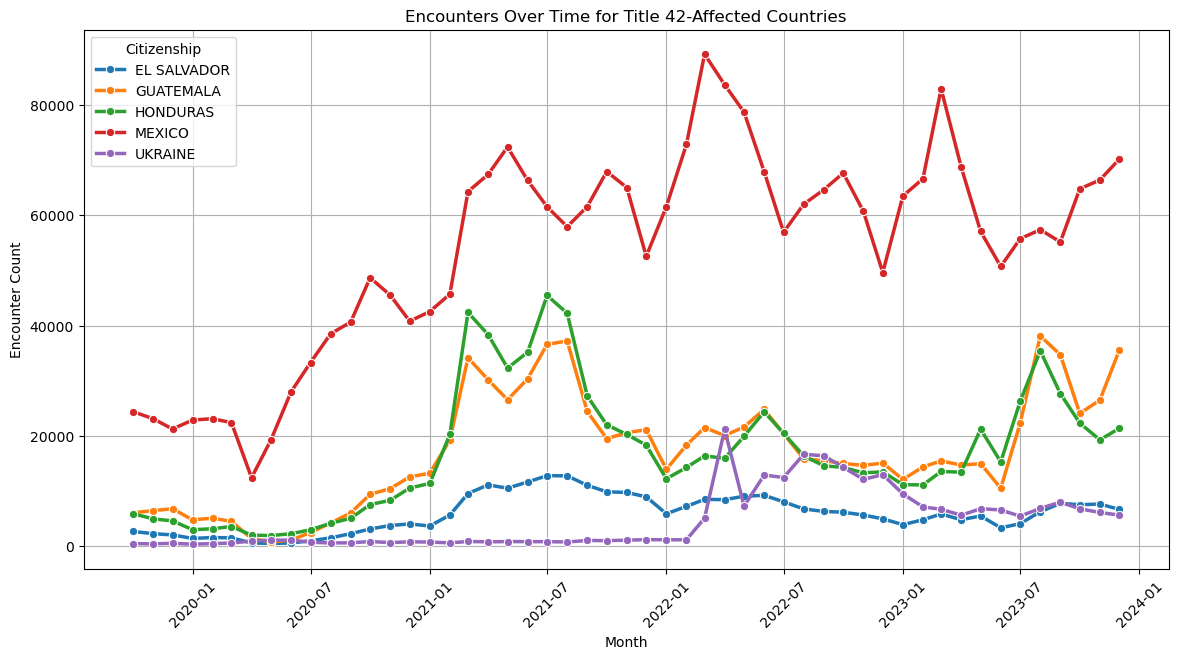

In [17]:
# Define countries of interest
affected_countries = ["UKRAINE", "MEXICO", "GUATEMALA", "HONDURAS", "EL SALVADOR"]

# Filter the dataset for those countries
filtered_data = train_df[train_df["Citizenship"].isin(affected_countries)]

# Aggregate encounters by MonthDate and Citizenship
df_agg = filtered_data.groupby(["Year-Date", "Citizenship"])["Encounter Count"].sum().reset_index()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))

# Plot each country separately
sns.lineplot(data=df_agg, x="Year-Date", y="Encounter Count", hue="Citizenship", marker="o", linewidth=2.5)

# Formatting
plt.xlabel("Month")
plt.ylabel("Encounter Count")
plt.title("Encounters Over Time for Title 42-Affected Countries")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.grid(True)

plt.show()


In [21]:


# Filter dataset for those countries
filtered_data = train_df[train_df["Citizenship"].isin(affected_countries)]

# Ensure Title of Authority column exists
if "Title of Authority" in filtered_data.columns:
    # Aggregate encounters by MonthDate, Citizenship, and Title of Authority
    df_agg = filtered_data.groupby(["Year-Date", "Citizenship", "Title of Authority"])["Encounter Count"].sum().reset_index()
else:
    print("Column 'Title of Authority' not found in dataset")


# Pivot data to separate Title 8 and Title 42
df_pivot = df_agg.pivot_table(index=["Year-Date", "Citizenship"], 
                              columns="Title of Authority", 
                              values="Encounter Count", 
                              fill_value=0).reset_index()


df_pivot


Title of Authority,Year-Date,Citizenship,Title 42,Title 8
0,2019-10-01,EL SALVADOR,0.0,2656.0
1,2019-10-01,GUATEMALA,0.0,6047.0
2,2019-10-01,HONDURAS,0.0,5878.0
3,2019-10-01,MEXICO,0.0,24391.0
4,2019-10-01,UKRAINE,0.0,464.0
...,...,...,...,...
250,2023-12-01,EL SALVADOR,0.0,6654.0
251,2023-12-01,GUATEMALA,0.0,35544.0
252,2023-12-01,HONDURAS,0.0,21361.0
253,2023-12-01,MEXICO,0.0,70191.0


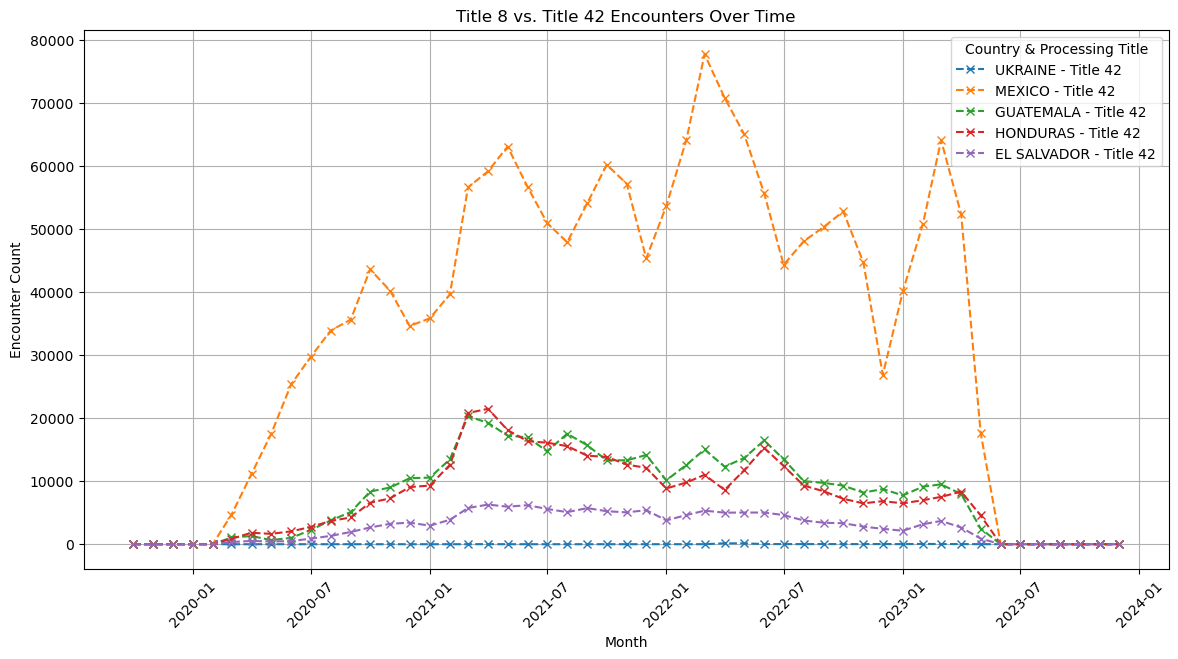

In [22]:
# Rename columns for clarity
df_pivot.columns = ["Year-Date", "Citizenship", "Title 42", "Title 8"]


plt.figure(figsize=(14, 7))

# Plot each country's Title 8 vs Title 42 encounters
for country in affected_countries:
    country_data = df_pivot[df_pivot["Citizenship"] == country]
    #plt.plot(country_data["Year-Date"], country_data["Title 8"], label=f"{country} - Title 8", linestyle='-', marker='o')
    plt.plot(country_data["Year-Date"], country_data["Title 42"], label=f"{country} - Title 42", linestyle='--', marker='x')

# Formatting
plt.xlabel("Month")
plt.ylabel("Encounter Count")
plt.title("Title 8 vs. Title 42 Encounters Over Time")
plt.xticks(rotation=45)
plt.legend(title="Country & Processing Title")
plt.grid(True)

plt.show()


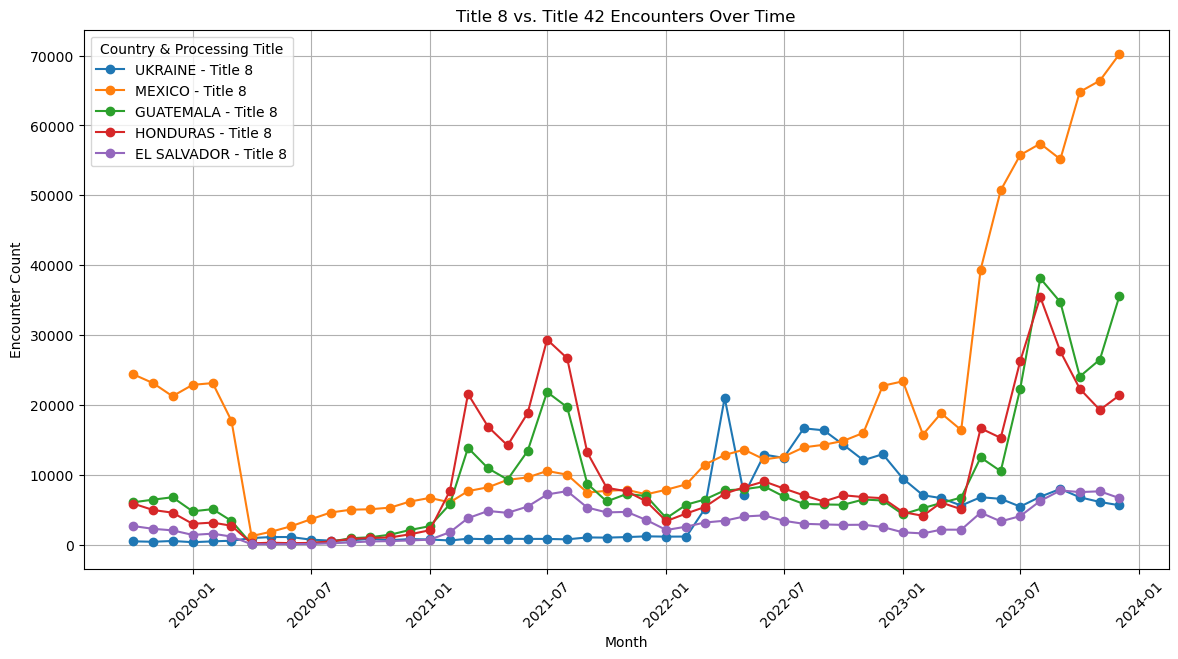

In [24]:
plt.figure(figsize=(14, 7))


for country in affected_countries:
    country_data = df_pivot[df_pivot["Citizenship"] == country]
    plt.plot(country_data["Year-Date"], country_data["Title 8"], label=f"{country} - Title 8", linestyle='-', marker='o')
    #plt.plot(country_data["Year-Date"], country_data["Title 42"], label=f"{country} - Title 42", linestyle='--', marker='x')

# Formatting
plt.xlabel("Month")
plt.ylabel("Encounter Count")
plt.title("Title 8 vs. Title 42 Encounters Over Time")
plt.xticks(rotation=45)
plt.legend(title="Country & Processing Title")
plt.grid(True)

plt.show()